# Assignment 3

As discussed in class, New York City's stop and frisk policy was found to be unconstitutional by a federal judge in 2013 (Floyd v. City of New York) on the grounds that it violated the Fourth Amendment (which prohibits unreasonable searches) and Fourteenth Amendment (which prohibits racial discrimination). Here, we use mapping techniques, applied to [stop and frisk data](https://5harad.com/data/sqf.RData), to examine some of the evidence which led to the Fourteenth Amendment ruling. 

And we will also use [census data](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.2012.html ) (2012 ACS for NYC) for this assignment. For this census data, you may also want to only [load some layers](https://geopandas.org/docs/user_guide/io.html) of this file. And you can also use ["listlayers" function in fiona package to check all layers](https://fiona.readthedocs.io/en/latest/manual.html#reading-multilayer-data) in 'datasets/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb'

Some special packages you may need in this assignments: geopandas, shapely, or maybe shapefile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install pandas
%pip install fiona
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Part 1
#### Filter all stop and frisk data with *suspected.crime* as "cpw" in NYC from 2012 to 2013, and randomly select 10,000 data points. Then, use the latitude and longitude values in the stop and frisk dataset (remember to create a geometry column for geopandas to use) and the shapefile of NYC, plot their locations on NYC map. Color each stop by the race of the pedestrian stopped. Write a couple sentences about what you see. (25 points)

Please note that 
* you only need to select five NYC counties in NY shapefile, and the FIPS codes of them are 005 (Bronx County), 047 (Kings County), 061 (New York County), 081 (Queens County), and 085 (Richmond County). 
* treat both "black hispanic" and "white hispanic" as "hispanic", and we only consider four races (white, black, Hispanic and Asian) in this assignment
* you may want to set latitude and longtitude range in your plot if necessary. 
* make your map and dots partially transparent, so it will be easier for you to observe some patterns
* set column value as 'COUNTYFP' during the plotting of NYC map, so it will give the whole county just one color
* make your figure clear enough to interpret

In [ ]:
import pandas as pd 

# Read stop and frisk dataset
df=pd.read_csv('/content/drive/MyDrive/sqf.csv')

# Filter and sample
filtered = df[(df["suspected.crime"] == "cpw") & df["year"].isin([2012, 2013])]
sampled = filtered.sample(n=10000)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,18,19,20,66,77) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Check layers of shapefile
import fiona
fiona.listlayers("/content/drive/MyDrive/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb")

['ACS_2012_5YR_TRACT_36_NEW_YORK',
 'X00_COUNTS',
 'X01_AGE_AND_SEX',
 'X02_RACE',
 'X03_HISPANIC_OR_LATINO_ORIGIN',
 'X04_ANCESTRY',
 'X05_FOREIGN_BORN_CITIZENSHIP',
 'X06_PLACE_OF_BIRTH',
 'X07_MIGRATION',
 'X08_COMMUTING',
 'X09_CHILDREN_HOUSEHOLD_RELATIONSHIP',
 'X10_GRANDPARENTS_GRANDCHILDREN',
 'X11_HOUSEHOLD_FAMILY_SUBFAMILIES',
 'X12_MARITAL_STATUS_AND_HISTORY',
 'X13_FERTILITY',
 'X14_SCHOOL_ENROLLMENT',
 'X15_EDUCATIONAL_ATTAINMENT',
 'X16_LANGUAGE_SPOKEN_AT_HOME',
 'X17_POVERTY',
 'X18_DISABILITY',
 'X19_INCOME',
 'X20_EARNINGS',
 'X21_VETERAN_STATUS',
 'X22_FOOD_STAMPS',
 'X23_EMPLOYMENT_STATUS',
 'X24_INDUSTRY_OCCUPATION',
 'X25_HOUSING_CHARACTERISTICS',
 'X26_GROUP_QUARTERS',
 'X27_HEALTH_INSURANCE',
 'TRACT_METADATA_2012']

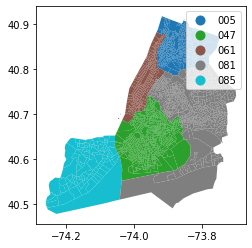

In [ ]:
import geopandas

# Load shapefile data
ny = geopandas.read_file("/content/drive/MyDrive/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb", layer="ACS_2012_5YR_TRACT_36_NEW_YORK")

# Limit file to selected counties
ny = ny[ny['COUNTYFP'].isin(["005", "047", "061", "081", "085"])]
ny.plot(column="COUNTYFP", legend=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


Text(0.5, 1.0, 'Locations of stop and frisk in 5 counties in NYC from 2012 to 2013')

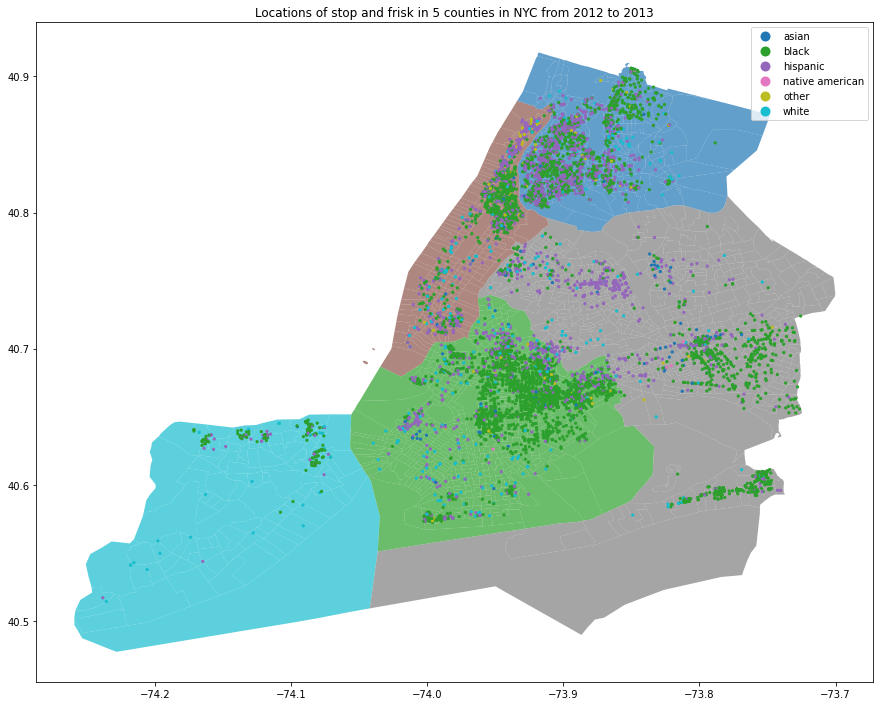

In [ ]:
from pandas.core.array_algos import replace
from geopandas.tools.sjoin import GeoDataFrame
from shapely import geometry
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Transform stop and frisk data points to geodataframe
sampled = sampled[sampled['lat'] > 40.3]
sampled['geometry'] = sampled.apply(lambda row: Point([row["lon"], row["lat"]]), axis=1)
sampled['race'] = sampled.apply(lambda row: row["suspect.race"] if row["suspect.race"] not in ["black hispanic", "white hispanic"] else "hispanic", axis=1)
sqf_gdf = GeoDataFrame(sampled)

# Plot
fig, ax = plt.subplots(figsize=(15, 15))
ny.plot(ax=ax, alpha=0.7, column='COUNTYFP', legend=True)
sqf_gdf.plot(ax=ax, alpha=1, column='race', legend=True, markersize=5)
ax.set_title("Locations of stop and frisk in 5 counties in NYC from 2012 to 2013")

Findings:

Out of all the suspects in the sampled dataset, the majority of them are black. There are also quite a few hispanic suspects. There are very few white, asian, or native american. 

Out of the five counties we chose to focus on, Kings County have the most frequent occurance of stop and frisk, followed by Bronx County and New York County. It happens the most infrequently in Richmond County.



## Part 2
#### Use the Census data shapefile, make four maps: 

1) plotting the population proportion of each block group which is white; 
2) plotting the population proportion of each block group which is black; 
3) plotting the population proportion of each block group which is Hispanic.
4) plotting the population proportion of each block group which is Asian.

#### Look at the maps from part 1 and part 2 side by side and write a few sentences summarizing your conclusions. (30 points)

*Please note:* 
* "In each geodatabase is a metadata file with a short name and a full description of each cell. The attribute table for each geodatabase contains the short names for each data element." (https://www.census.gov/programs-surveys/geography/technical-documentation/records-layout/tiger-line-demo-record-layouts.html) 
* You may want to use the density of color to show the difference of population proportion
* make your figures clear enough to interpret

In [ ]:
# Read race data
race = geopandas.read_file("/content/drive/MyDrive/ACS_2012_5YR_TRACT_36_NEW_YORK.gdb", layer="X03_HISPANIC_OR_LATINO_ORIGIN")

# Select appropriate columns
# Total population: B03002e1, Total white: B03002e3, Total black: B03002e4, Total asian: B03002e6, total hispanic: B03002e12
race = race[["GEOID", "B03002e1", "B03002e3", "B03002e4", "B03002e6", "B03002e12"]]
race.rename(columns={"B03002e1": "total", "B03002e3": "white", "B03002e4": "black", "B03002e6": "asian", "B03002e12": "hispanic"}, inplace=True)

# Calculate proportion by race
race["white_prop"] = race["white"] / race["total"]
race["black_prop"] = race["black"] / race["total"]
race["asian_prop"] = race["asian"] / race["total"]
race["hispanic_prop"] = race["hispanic"] / race["total"]

# Process GEOID data format
race["GEOID_modified"] = race.apply(lambda row: row["GEOID"][7:],  axis=1)

# Merge with geometry data
merged = ny.merge(race, left_on="GEOID", right_on="GEOID_modified")

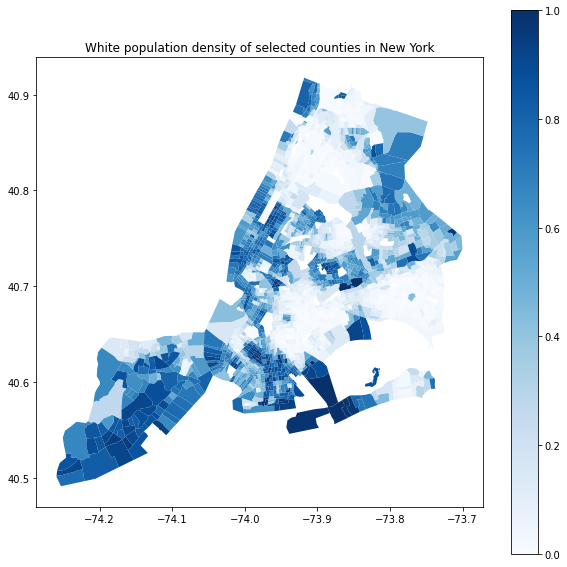

In [ ]:
# Plot white population density
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='white_prop', cmap='Blues', legend=True)
ax.set_title("White population density of selected counties in New York")
plt.show()

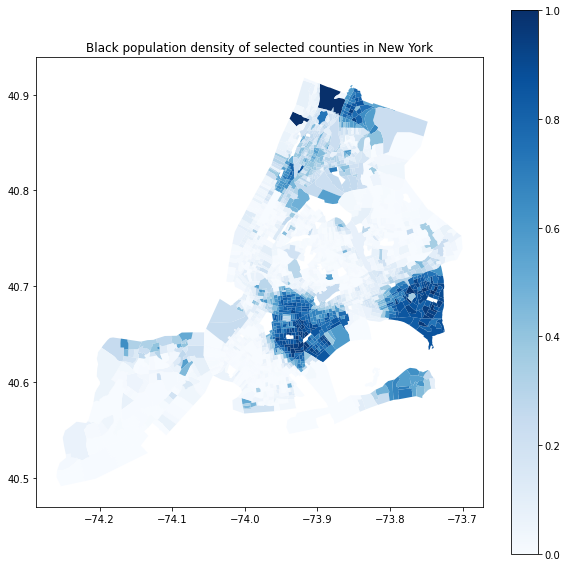

In [ ]:
# Plot black population density
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='black_prop', cmap='Blues', legend=True)
ax.set_title("Black population density of selected counties in New York")
plt.show()

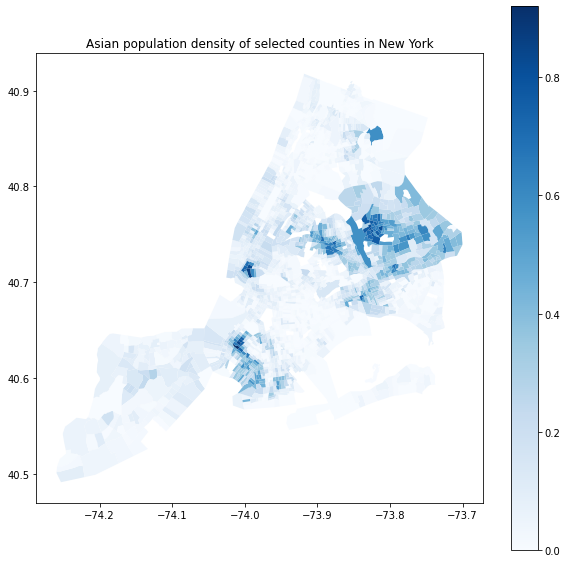

In [ ]:
# Plot asian population density
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='asian_prop', cmap='Blues', legend=True)
ax.set_title("Asian population density of selected counties in New York")
plt.show()

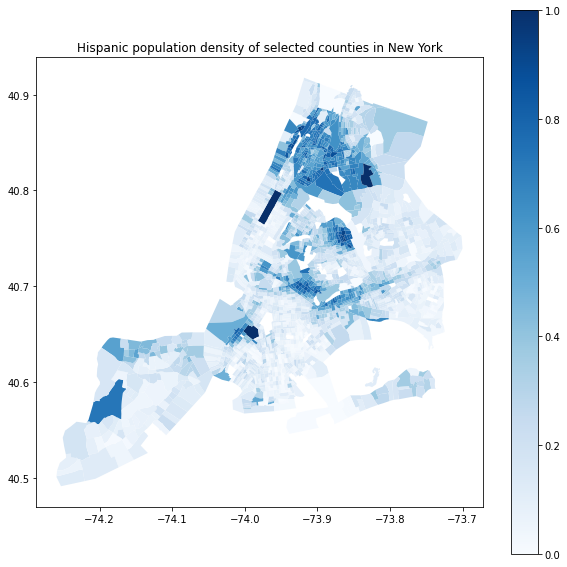

In [ ]:
# Plot hispanic population density
fig, ax = plt.subplots(figsize=(10, 10))
merged.plot(ax=ax, column='hispanic_prop', cmap='Blues', legend=True)
ax.set_title("Hispanic population density of selected counties in New York")
plt.show()

Findings:
1. Even though white population is comparatively more dense than other races in the selected area, the frequency of the stop and frisk suspect being white is disproportionally low. The areas where white population is most dense has very low rate of stop and frisk.

2. The black population is very dense in two areas: Kings County and the sounth east corner of Queens County. Kings County also happen to have the frequent stop and frisk incidents where the suspect is black.

3. The hispanic population is more dense in the northern areas, which is also where more hispanic pedestrains are stopped by the police.

4. Asians are thinly populated in the selected area. There are also very few occurances of asian pedestrains stopped by the police.

## Part 3
#### Use [NYPD's precinct and population data](https://johnkeefe.net/nyc-police-precinct-and-census-data) (*nyc_2010pop_2020precincts* and *geo_export*) and map each stop (from 2012 to 2013) to a Census block group using a [spatial join](https://geopandas.org/gallery/spatial_joins.html) (please refer to this [document](https://www.documentcloud.org/documents/87708-pl94-171-1.html#document/p64) for the meanings of different columns in this dataset.) 
#### Make a plot where each point represents one Census block group with more than 1000 residents, the x-axis is the proportion of the block group population which is white, and the y-axis is the number of stops per capita in this block. And make a regression line to show the trend in this plot. (15 points)

In [ ]:
df_precinct = pd.read_csv('/content/drive/MyDrive/nyc_2010pop_2020precincts.csv')
df_precinct

,precinct_2020,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,...,P0020064,P0020065,P0020066,P0020067,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073
0,1,66679,64416,50484,2162,89,10569,26,1086,2263,...,0,1,1,0,0,0,0,0,0,0
1,5,52568,51415,13436,2784,81,32795,18,2301,1153,...,0,1,1,0,0,0,0,0,0,0
2,6,62226,60490,53227,1316,80,5023,21,823,1736,...,0,2,2,0,0,0,0,0,0,0
3,7,56355,54055,21520,5992,326,19328,28,6861,2300,...,0,2,0,2,0,0,0,0,0,0
4,9,76443,73259,48175,6904,361,10946,45,6828,3184,...,0,2,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115,171576,162076,66142,13700,1914,27250,85,52985,9500,...,0,5,1,4,0,0,0,0,0,0
73,120,113008,108593,58854,28373,686,8922,59,11699,4415,...,0,4,4,0,0,0,0,0,0,0
74,121,118708,114773,73769,16688,557,13217,78,10464,3935,...,0,0,0,0,0,0,0,0,0,0
75,122,138982,136452,119790,3397,330,8474,43,4418,2530,...,0,1,0,1,0,0,0,0,0,0


In [ ]:
precinct_geo = geopandas.read_file("/content/drive/MyDrive/NYC_Police_Precincts_2020")
precinct_geo

,precinct,shape_area,shape_leng,geometry
0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5.0,1.808880e+07,18676.124259,"POLYGON ((-73.98864 40.72293, -73.98869 40.722..."
2,6.0,2.209819e+07,26402.900691,"POLYGON ((-73.99968 40.73855, -73.99684 40.737..."
3,71.0,4.533179e+07,29978.094261,"POLYGON ((-73.92854 40.66457, -73.92872 40.664..."
4,72.0,1.046213e+08,87968.194520,"POLYGON ((-73.99841 40.67187, -73.99830 40.671..."
...,...,...,...,...
72,115.0,1.133427e+08,60051.601409,"POLYGON ((-73.85908 40.76252, -73.85943 40.762..."
73,120.0,2.323947e+08,92981.054878,"POLYGON ((-74.05357 40.60370, -74.05407 40.603..."
74,121.0,4.756924e+08,136834.152823,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
75,122.0,4.548001e+08,154876.386299,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [ ]:
# Merge two datasets on their precinct column
precinct_merged = df_precinct.merge(precinct_geo, left_on="precinct_2020", right_on="precinct")
precinct_merged

,precinct_2020,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,...,P0020068,P0020069,P0020070,P0020071,P0020072,P0020073,precinct,shape_area,shape_leng,geometry
0,1,66679,64416,50484,2162,89,10569,26,1086,2263,...,0,0,0,0,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ..."
1,5,52568,51415,13436,2784,81,32795,18,2301,1153,...,0,0,0,0,0,0,5.0,1.808880e+07,18676.124259,"POLYGON ((-73.98864 40.72293, -73.98869 40.722..."
2,6,62226,60490,53227,1316,80,5023,21,823,1736,...,0,0,0,0,0,0,6.0,2.209819e+07,26402.900691,"POLYGON ((-73.99968 40.73855, -73.99684 40.737..."
3,7,56355,54055,21520,5992,326,19328,28,6861,2300,...,0,0,0,0,0,0,7.0,1.836402e+07,17301.308681,"POLYGON ((-73.97345 40.71896, -73.97351 40.718..."
4,9,76443,73259,48175,6904,361,10946,45,6828,3184,...,0,0,0,0,0,0,9.0,2.139423e+07,19773.233396,"POLYGON ((-73.97161 40.72672, -73.97163 40.726..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115,171576,162076,66142,13700,1914,27250,85,52985,9500,...,0,0,0,0,0,0,115.0,1.133427e+08,60051.601409,"POLYGON ((-73.85908 40.76252, -73.85943 40.762..."
73,120,113008,108593,58854,28373,686,8922,59,11699,4415,...,0,0,0,0,0,0,120.0,2.323947e+08,92981.054878,"POLYGON ((-74.05357 40.60370, -74.05407 40.603..."
74,121,118708,114773,73769,16688,557,13217,78,10464,3935,...,0,0,0,0,0,0,121.0,4.756924e+08,136834.152823,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ..."
75,122,138982,136452,119790,3397,330,8474,43,4418,2530,...,0,0,0,0,0,0,122.0,4.548001e+08,154876.386299,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."


In [ ]:
# Transform to geodataframe
precinct_merged = geopandas.GeoDataFrame(precinct_merged)

In [ ]:
%pip uninstall geopandas #Choose Y when it first prompts, restart runtime, and choose N when it prompts for a second time, and the code will run. Otherwise, at spatial merge it will say package not installed

Found existing installation: geopandas 0.10.2
Uninstalling geopandas-0.10.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/geopandas-0.10.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/geopandas/*
Proceed (y/n)? n


In [ ]:
%pip install pandas fiona shapely pyproj rtree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Spatial Merge
sqf_gdf.crs = precinct_merged.crs

df_joined = sqf_gdf.sjoin(precinct_merged, how="right")
df_joined

,index_left,year,date,time,xcoord,ycoord,serial,radio.run,inside.outside,location.housing,...,P0020072,P0020073,precinct_x,shape_area,shape_leng,geometry,precinct_y,precinct,stop count,stop per capita
0,3567635,2012,2012-04-27,16:10,980442.0,197919.0,1216.0,False,False,neither,...,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180
0,3764707,2012,2012-08-27,18:51,982159.0,199928.0,2271.0,True,False,neither,...,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180
0,3895553,2013,2013-02-15,13:26,980297.0,195966.0,374.0,False,True,transit,...,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180
0,3895277,2013,2013-01-17,04:40,984864.0,203135.0,95.0,False,False,neither,...,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180
0,3994670,2013,2013-05-06,19:15,980772.0,194845.0,793.0,False,True,transit,...,0,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,3741531,2012,2012-08-07,23:10,929719.0,139619.0,1423.0,True,False,neither,...,0,0,123.0,4.608700e+08,120830.181005,"POLYGON ((-74.16983 40.56108, -74.16974 40.560...",123.0,123.0,9,0.000092
75,3700387,2012,2012-05-15,22:15,923723.0,136499.0,1006.0,False,False,neither,...,0,0,123.0,4.608700e+08,120830.181005,"POLYGON ((-74.16983 40.56108, -74.16974 40.560...",123.0,123.0,9,0.000092
75,3700492,2012,2012-05-31,00:25,935998.0,143904.0,1112.0,False,False,neither,...,0,0,123.0,4.608700e+08,120830.181005,"POLYGON ((-74.16983 40.56108, -74.16974 40.560...",123.0,123.0,9,0.000092
75,3700356,2012,2012-05-17,06:15,918730.0,126770.0,975.0,True,False,neither,...,0,0,123.0,4.608700e+08,120830.181005,"POLYGON ((-74.16983 40.56108, -74.16974 40.560...",123.0,123.0,9,0.000092


In [ ]:
# Count stops for census block groups with more than 1000 residents
df_count = df_joined.groupby(['precinct']).size().reset_index(name='stop counts')
precinct_over_1000 = precinct_merged[precinct_merged['P0020001'] >= 1000] # P0010001-P0010008 don't have data on Hispanic population, so we're using P0020001-P0020010
precinct_merged = pd.pandas.merge(precinct_over_1000, df_count, left_index=True, right_index=True, suffixes=('', '_drop')) # Removing repeated columns from merge
precinct_merged.drop([col for col in precinct_merged.columns if 'drop' in col], axis=1, inplace=True)
precinct_merged = precinct_merged.loc[:,~precinct_merged.columns.duplicated()].copy()
precinct_merged

,precinct_2020,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,...,P0020073,precinct_x,shape_area,shape_leng,geometry,precinct_y,precinct,stop count,stop per capita,stop counts
0,1,66679,64416,50484,2162,89,10569,26,1086,2263,...,0,1.0,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180,12
1,5,52568,51415,13436,2784,81,32795,18,2301,1153,...,0,5.0,1.808880e+07,18676.124259,"POLYGON ((-73.98864 40.72293, -73.98869 40.722...",5.0,5.0,18,0.000342,18
2,6,62226,60490,53227,1316,80,5023,21,823,1736,...,0,6.0,2.209819e+07,26402.900691,"POLYGON ((-73.99968 40.73855, -73.99684 40.737...",6.0,6.0,17,0.000273,17
3,7,56355,54055,21520,5992,326,19328,28,6861,2300,...,0,7.0,1.836402e+07,17301.308681,"POLYGON ((-73.97345 40.71896, -73.97351 40.718...",7.0,7.0,57,0.001011,57
4,9,76443,73259,48175,6904,361,10946,45,6828,3184,...,0,9.0,2.139423e+07,19773.233396,"POLYGON ((-73.97161 40.72672, -73.97163 40.726...",9.0,9.0,57,0.000746,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,115,171576,162076,66142,13700,1914,27250,85,52985,9500,...,0,115.0,1.133427e+08,60051.601409,"POLYGON ((-73.85908 40.76252, -73.85943 40.762...",115.0,115.0,57,0.000332,57
72,120,113008,108593,58854,28373,686,8922,59,11699,4415,...,0,120.0,2.323947e+08,92981.054878,"POLYGON ((-74.05357 40.60370, -74.05407 40.603...",120.0,120.0,157,0.001389,157
73,121,118708,114773,73769,16688,557,13217,78,10464,3935,...,0,121.0,4.756924e+08,136834.152823,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",121.0,121.0,49,0.000413,49
74,122,138982,136452,119790,3397,330,8474,43,4418,2530,...,0,122.0,4.548001e+08,154876.386299,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",122.0,122.0,8,0.000058,8


In [ ]:
# Calculate stop per capita for each princinct & for white population
precinct_merged['stops per capita'] = precinct_merged['stop counts'] / precinct_merged['P0020001'] 
precinct_merged['percentage_white'] = precinct_merged['P0020005'] / precinct_merged['P0020001'] 
precinct_merged

,precinct_2020,P0010001,P0010002,P0010003,P0010004,P0010005,P0010006,P0010007,P0010008,P0010009,...,shape_area,shape_leng,geometry,precinct_y,precinct,stop count,stop per capita,stop counts,stops per capita,percentage_white
0,1,66679,64416,50484,2162,89,10569,26,1086,2263,...,4.731472e+07,80797.248803,"MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...",1.0,1.0,12,0.000180,12,0.000180,0.708334
1,5,52568,51415,13436,2784,81,32795,18,2301,1153,...,1.808880e+07,18676.124259,"POLYGON ((-73.98864 40.72293, -73.98869 40.722...",5.0,5.0,18,0.000342,18,0.000342,0.204288
2,6,62226,60490,53227,1316,80,5023,21,823,1736,...,2.209819e+07,26402.900691,"POLYGON ((-73.99968 40.73855, -73.99684 40.737...",6.0,6.0,17,0.000273,17,0.000273,0.811044
3,7,56355,54055,21520,5992,326,19328,28,6861,2300,...,1.836402e+07,17301.308681,"POLYGON ((-73.97345 40.71896, -73.97351 40.718...",7.0,7.0,57,0.001011,57,0.001011,0.239180
4,9,76443,73259,48175,6904,361,10946,45,6828,3184,...,2.139423e+07,19773.233396,"POLYGON ((-73.97161 40.72672, -73.97163 40.726...",9.0,9.0,57,0.000746,57,0.000746,0.517510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,115,171576,162076,66142,13700,1914,27250,85,52985,9500,...,1.133427e+08,60051.601409,"POLYGON ((-73.85908 40.76252, -73.85943 40.762...",115.0,115.0,57,0.000332,57,0.000332,0.118513
72,120,113008,108593,58854,28373,686,8922,59,11699,4415,...,2.323947e+08,92981.054878,"POLYGON ((-74.05357 40.60370, -74.05407 40.603...",120.0,120.0,157,0.001389,157,0.001389,0.407591
73,121,118708,114773,73769,16688,557,13217,78,10464,3935,...,4.756924e+08,136834.152823,"MULTIPOLYGON (((-74.15946 40.64145, -74.15975 ...",121.0,121.0,49,0.000413,49,0.000413,0.513310
74,122,138982,136452,119790,3397,330,8474,43,4418,2530,...,4.548001e+08,154876.386299,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",122.0,122.0,8,0.000058,8,0.000058,0.790599


In [ ]:
# Create a function to plot the regression line
from scipy.stats import linregress

def plotRegression(df, x, y):
  df['binned_x'] = df[x].map(lambda x:round(x, 1))
  binned_predictions = df.groupby('binned_x')[y].mean()
  plt.scatter(df[x], df[y], label='data')
  plt.plot(binned_predictions.index, binned_predictions.values, color='black', label='binned fit')

  slope, intercept, _, _, _ = linregress(df[x], df[y])

  plt.plot([df[x].min(), 
          df[x].max()], 
         [df[x].min() * slope + intercept, 
          df[x].max() * slope + intercept], 
         color='orange', 
         label='linear regression fit')
  plt.legend()

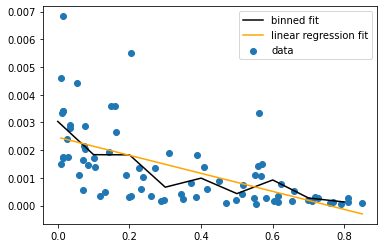

In [ ]:
# Plot of percentage of White population against per capita stops 

plotRegression(precinct_merged, 'percentage_white', 'stops per capita')

#### Now make the same plot, but plot a separate series for each race group (Black, Hispanic, Asian). In other words, the plot for black pedestrians should has the x-axis for Black population and y-axis for stops per capita. Summarize the conclusions from these plots. (20 points)

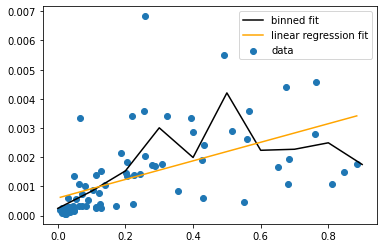

In [ ]:
# Using the same method, plot the percentage of Black population against per capita stops
precinct_merged['percentage_black'] = precinct_merged['P0020006'] / precinct_merged['P0020001'] 

plotRegression(precinct_merged, 'percentage_black', 'stops per capita')

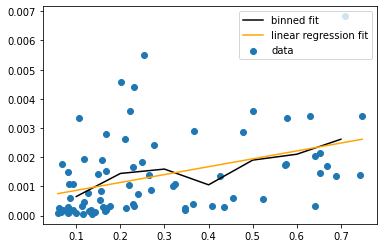

In [ ]:
# plot the percentage of Hispanic population against per capita stops
precinct_merged['percentage_hispanic'] = precinct_merged['P0020002'] / precinct_merged['P0020001'] 

plotRegression(precinct_merged, 'percentage_hispanic', 'stops per capita')

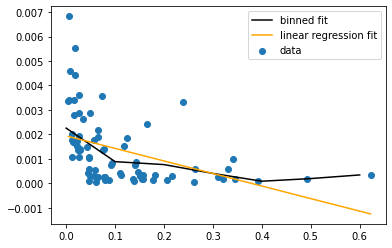

In [ ]:
# plot the percentage of Asian population against per capita stops
precinct_merged['percentage_asian'] = precinct_merged['P0020008'] / precinct_merged['P0020001'] 

plotRegression(precinct_merged, 'percentage_asian', 'stops per capita')

From the above graphs, we can see that the plot of the percentage of White population against per capita stops and the plot of the percentage of Asian population against per capita stops both show a negative correlation, suggesting that neighborhoods with a higher White or Asian population have lower stop and frisk rates. <br>
In contrast, the plot of the percentage of Black population against per capita stops and the plot of the percentage of Hispanic population against per capita stops both show a positive correlation, suggesting that neighborhoods with a higher Black or Hispanic population have higher stop and frisk rates. <br>
If we compare the slopes of each graph, we see slope of the plot for Black population is steeper than that of Hispanic population, showing that the correlation between their ethnicity and stop and frisk rate is much stronger. The distinction in slope for White and Asian is less obvious. However, we can also observe that the data for White population is more uniformally distributed around the regression line, whereas the data for Asian population is more congregated in the low density range. This suggests that there is only a few neighborhoods with a large Asian population density, whereas White population is more uniformally distributed acorss NYC.

## Part 4
#### Read http://www.stat.columbia.edu/~gelman/research/published/frisk9.pdf. Summarize the argument it is responding to, and the counterargument it makes. (10 points)

The study is responding to the argument that the rates at which ethnic minority groups are stopped and frisked only reflect race-specific crime rates. For example, given that African Americans commit 30% more crimes than Caucasians, it is justifiable that African Americans have a 30% higher chance of being stopped by police officers. <br>
The counterargument is that members of minority groups are stopped far more often than Caucasians, both in comparison to their percentage in overall population and the rates of crimes they committed. After controlling for precincts, this observation still holds. There is also additional evidence showing that stops of African Americans and Hispanics were less likely to lead to arrests compared to stops of Caucasians. Although the study is not concluding definitely that NYPD is acting in a racist manner, this statistical pattern does shed some light on the fact that police use more relaxed standards/wider discretion when deciding to stop ethnic minorities on the street.